In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [14]:
def Niv(x,t):
    S, Sv, Su, Svc, Svn, Suc, Sun, E, C, I, Iit, It, R, D, Sp, Ep, Ip = x
    dx = np.zeros(17)
    dx[0]= Lambda - (chi1 + chi2 +mu)*S +varepsilon*R
    dx[1]= chi2*S-(tau1 + tau2+ mu)*Sv
    dx[2]= chi1*S-(eta1 +eta2 +mu)*Su
    dx[3]= tau1*Sv-(((a2*C +a3*I +a4*It +a5*D)/N+(a1*Ip)/Np)*beta1+mu)*Svc
    dx[4]= tau2*Sv -(((b2*C +b3*I +b4*It +b5*D)/N+(b1*Ip)/Np)*beta2+mu)*Svn
    dx[5]= eta1*Su -(((q2*C +q3*I +q4*It +q5*D)/N+(q1*Ip)/Np) *beta3+mu)*Suc
    dx[6]= eta2*Su-(((z2*C +z3*I +z4*It +z5*D)/N+(z1*Ip)/Np)*beta4+mu)*Sun
    dx[7]= ((b2*C +b3*I +b4*It +b5*D)/N+(b1*Ip)/Np)*beta2*Svn + ((z2*C +z3*I +z4*It +z5*D)/N+(z1*Ip)/Np)*beta4*Sun +((q2*C +q3*I +q4*It +q5*D)/N+(q1*Ip)/Np) *beta3*Suc +((a2*C +a3*I +a4*It +a5*D)/N+(a1*Ip)/Np)*beta1*Svc-(mu+theta+kappa)*E
    dx[8]= theta *E -(gamma3 +mu +delta1)*C   #-alpha*C
    dx[9]= kappa*E -(psi1+psi2+mu +delta2 +gamma4)*I
    dx[10]= psi1 *I-(gamma2+mu+delta3)*Iit  #+ alpha*C
    dx[11]= psi2 *I -(gamma1+mu +delta4)*It 
    dx[12]= gamma2*Iit +gamma4*I+ gamma1*It+gamma3*C-mu*R -varepsilon*R
    dx[13]= delta4 *It +delta3 *Iit +delta1*C+ delta2*I-mud*D
    dx[14]= Lambda2-(sigma +mu2)*Sp
    dx[15]= sigma*Sp -(rho + mu2)*Ep 
    dx[16]= rho *Ep -(mu2 +delta5)*Ip
    return dx

In [15]:

N=1005
Np=150
Lambda2=5
Lambda=10
S0=1000
Sv0= 420
Su0= 370
Svc0= 200
Svn0= 210
Suc0= 190
Sun0=175
E0=10 
I0=5
Iit0=4
It0= 0
C0=0
R0=0
D0=3
Sp0=138
Ep0=3
Ip0=2

sigma=0.75
rho=0.56

varepsilon= 0.03  #0.04 #subject to change
alpha=0.732     #subject to change

#a1, a2, a3, a4, a5=[0.58,0.57,0.54,0.57,0.56] 
#b1, b2, b3, b4, b5=[0.69,0.68,0.67,0.66,0.66]
#q1, q2, q3, q4, q5=[0.75,0.77,0.79,0.77,0.76]
#z1, z2, z3, z4, z5=[0.95,0.94,0.96,0.97,0.95]
#a1, a2, a3, a4, a5=[0.58,0.57,0.54,0.57,0.00032] 
#b1, b2, b3, b4, b5=[0.69,0.58,0.57,0.56,0.00040]
#q1, q2, q3, q4, q5=[0.75,0.57,0.59,0.57,0.00010]
#z1, z2, z3, z4, z5=[0.95,0.54,0.56,0.57,0.0008]
a1, a2, a3, a4, a5=[0.58,0.513,0.486,0.513,0.000288] 
b1, b2, b3, b4, b5=[0.69,0.522,0.513,0.504,0.000324]
q1, q2, q3, q4, q5=[0.75,0.4617,0.531,0.513,0.000648]
z1, z2, z3, z4, z5=[0.95,0.4374,0.504,0.513,0.000648]
beta1, beta2, beta3, beta4=[0.1134,0.3969,0.4455,0.7209] 
gamma1=0.8
gamma2=0.5
gamma3=0.09
gamma4=0.1

mu=0.0003421 #changed 
mu2=0.00011
delta5=0.36
mud=0.7 #can still change it
theta=0.486
kappa= 0.715 
delta1=0.02    #0.209
delta2=0.15    #0.135
delta3=0.0171  #0.00171
delta4=0.2  #0.00165
#delta5=0.062

psi1=0.825
psi2=0.342
#Gamma1=0.18
#Gamma2=0.46
#Gamma3=0.58
#Gamma4= 0.98
chi1=0.33
chi2=0.62
eta1=0.45
eta2=0.39
tau1=0.008
tau2=0.019


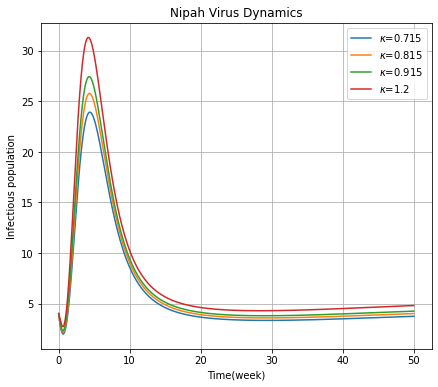

In [26]:
t = np.linspace(0, 50, 10000)


plt.figure(figsize = (7,6))
#beta1_range=[0.1134, 0.21, 0.67, 0.98]
#a2_range=[ 0.98, 1.3]

for kappa in [0.715, 0.815,0.915,1.2]:
    x = odeint(Niv, [S0,Sv0,Su0,Svc0,Svn0,Suc0,Sun0,E0,I0,Iit0,It0,C0,R0,D0,Sp0,Ep0,Ip0], t)
    S= x[:,0]; Sv = x[:,1]; Su = x[:,2]; Svc= x[:,3]; Svn = x[:,4]; Suc = x[:,5]; Sun = x[:,6]; E = x[:,7]; C = x[:,8]; I= x[:,9]; Iit = x[:,10]; It = x[:,11]; R = x[:,12]; D= x[:,13]; Sp=x[:,14]; Ep=x[:,15]; Ip=x[:,16]
    plt.plot(t,I, label=fr'$\kappa$={kappa}')


#plt.plot(t,Svc, label=f'beta1={beta1}')






#x = odeint(Niv, [S0,Sv0,Su0,Svc0,Svn0,Suc0,Sun0,E0,I0,Iit0,It0,C0,R0,D0,Sp0,Ep0,Ip0], t)
#S= x[:,0]; Sv = x[:,1]; Su = x[:,2]; Svc= x[:,3]; Svn = x[:,4]; Suc = x[:,5]; Sun = x[:,6]; E = x[:,7]; C = x[:,8]; I= x[:,9]; Iit = x[:,10]; It = x[:,11]; R = x[:,12]; D= x[:,13]; Sp=x[:,14]; Ep=x[:,15]; Ip=x[:,16]


#plt.figure(figsize = (7,6))

#plt.plot(t,S, color = "green", lw =1.5, label="S")
#plt.plot(t, E, color = "olive", lw =1.5, label="E")
#plt.plot(Iit, R, color = "red", lw =1.5, label="Su")
#plt.plot(t,Svc, color="green", lw=1.5, label= " Svc")
#plt.plot(t,Svn, color="magenta", lw=1.5, label= " Svn")
#plt.plot(t,Suc, color="brown", lw=1.5, label= " Suc")
#plt.plot(t,Sun, color="red", lw=1.5, label= " Sun")
#plt.plot(t,E, color = "olive", lw =1.5, label= "E")
#plt.plot(t,I, color="red", lw=1.5, label= " I")
#plt.plot(t, C, color = "magenta", lw =1.5, label="C")
#plt.plot(t, Iit, color = "blue", lw =1.5, label= "Iit")
#plt.plot(t, It, color = "brown", lw =1.5, label= "It")
#plt.plot(t, D, color = "black", lw =1.5, label= "D")
#plt.plot(t, Sp, color = "green", lw =1.5, label= "Sp")
#plt.plot(t, Ep, color = "magenta", lw =1.5, label= "Ep")
#plt.plot(t, Ip, color = "red", lw =1.5, label= "Ip")
#plt.plot(t, R, color = "green", lw =1.5, label= "R")

plt.xlabel("Time(week)")
plt.ylabel( "Infectious population")
plt.title("Nipah Virus Dynamics")


plt.grid()
plt.legend()
plt.show()
